In [1]:
# Start writing code here...

In [2]:


df_1 = _deepnote_execute_sql("""SELECT *
FROM 'best_selling_switch_games.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_1

,title,copies_sold,genre,developer,publisher,as_of,release_date
0,Mario Kart 8 Deluxe,48410000.0,Kart racing,Nintendo EPD,Nintendo,2022-09-30,2017-04-28
1,Animal Crossing: New Horizons,40170000.0,Social simulation,Nintendo EPD,Nintendo,2022-09-30,2020-03-20
2,Super Smash Bros. Ultimate,29530000.0,Fighting,Bandai Namco StudiosSora Ltd.,Nintendo,2022-09-30,2018-12-07
3,The Legend of Zelda: Breath of the Wild,27790000.0,Action-adventure,Nintendo EPD,Nintendo,2022-09-30,2017-03-03
4,Pokémon Sword and Shield,25370000.0,Role-playing,Game Freak,The Pokémon CompanyNintendo,2022-09-30,2019-11-15
...,...,...,...,...,...,...,...
68,Fitness Boxing,1000000.0,Exergamerhythm,Imagineer,JP: ImagineerNA/PAL: Nintendo,2020-09-08,2018-12-20
69,Fitness Boxing 2: Rhythm and Exercise,1000000.0,Exergamerhythm,Imagineer,JP: ImagineerNA/PAL: Nintendo,2021-12-09,2020-12-04
70,Shin Megami Tensei V,1000000.0,Role-playing,Atlus,JP: AtlusNA: SegaPAL: Nintendo,2022-04-18,2021-11-11
71,Story of Seasons: Pioneers of Olive Town,1000000.0,Simulationrole-playing,Marvelous,Xseed Games,2021-11-18,2021-02-25


# Librerías importadas

In [3]:
import pandas as pd
df = pd.read_csv('best_selling_switch_games.csv')

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime as dt

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         73 non-null     object 
 1   copies_sold   73 non-null     float64
 2   genre         73 non-null     object 
 3   developer     73 non-null     object 
 4   publisher     73 non-null     object 
 5   as_of         73 non-null     object 
 6   release_date  73 non-null     object 
dtypes: float64(1), object(6)
memory usage: 4.1+ KB


# Estadísticos descriptivos

In [6]:
df['copies_sold'].mean() 

6788904.109589041

In [7]:
df['copies_sold'].median() 

3010000.0

# Top 10 juegos con mayores ventas

In [8]:
top_10_games = df[['title', 'copies_sold']].sort_values(by=['copies_sold'], ascending = False).head(10)

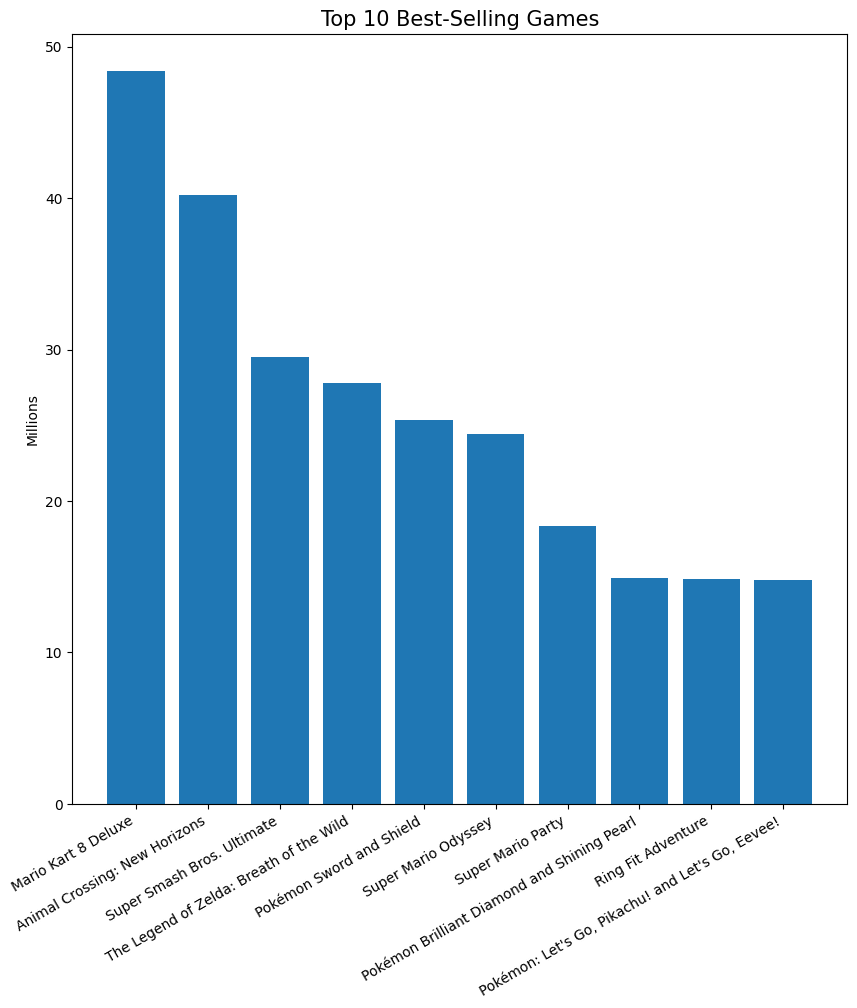

In [10]:
plt.figure(figsize=(10,10))
plt.bar(top_10_games['title'], top_10_games['copies_sold']/1000000)
plt.title('Top 10 Best-Selling Games', fontsize = 15)
plt.ylabel('Millions')
plt.xticks(rotation = 30, ha ='right')
plt.show()

In [12]:
top_5_games = df[['genre', 'copies_sold']].sort_values(by=['copies_sold'], ascending = False).head(5)

# Top 5 Géneros con mayores ventas

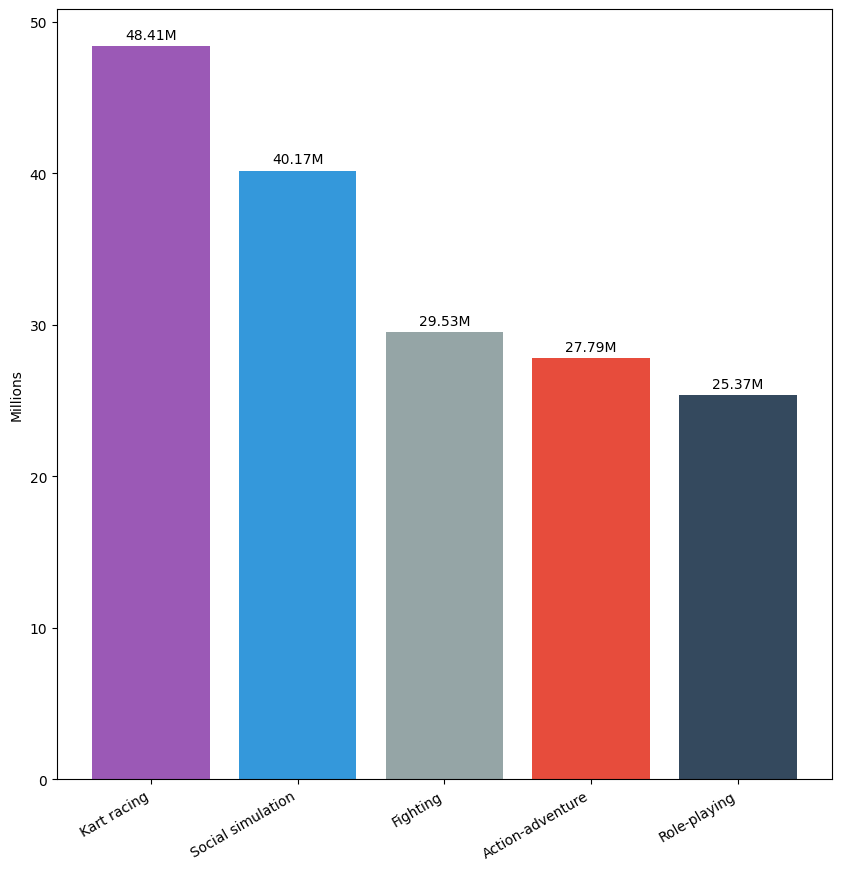

In [36]:
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e"]
color_dict = {"Kart racing":colors[0], "Social simulation":colors[1], "Fighting":colors[2], "Action-adventure":colors[3], "Role-playing":colors[4]}
colors = [color_dict[x] for x in top_5_games['genre']]
plt.figure(figsize=(10,10))
barlist = plt.bar(top_5_games['genre'], top_5_games['copies_sold']/1000000, color=colors)
for i,bar in enumerate(barlist):
    plt.annotate("{:.2f}M".format(top_5_games['copies_sold'][i]/1000000),xy=(bar.get_x() + bar.get_width()/2, bar.get_height()), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', rotation = 0)
plt.ylabel('Millions')
plt.xticks(rotation = 30, ha ='right')
plt.show()

# Evolutivo ventas por año "Periodo 2018 - 2022"

In [24]:
df['as_of'] = pd.to_datetime(df['as_of'])
df['year'] = df['as_of'].dt.year.astype('str')

year_df = df.groupby('year').sum().reset_index()
year_df

,year,copies_sold
0,2018,2000000.0
1,2019,1000000.0
2,2020,5620000.0
3,2021,86260000.0
4,2022,400710000.0


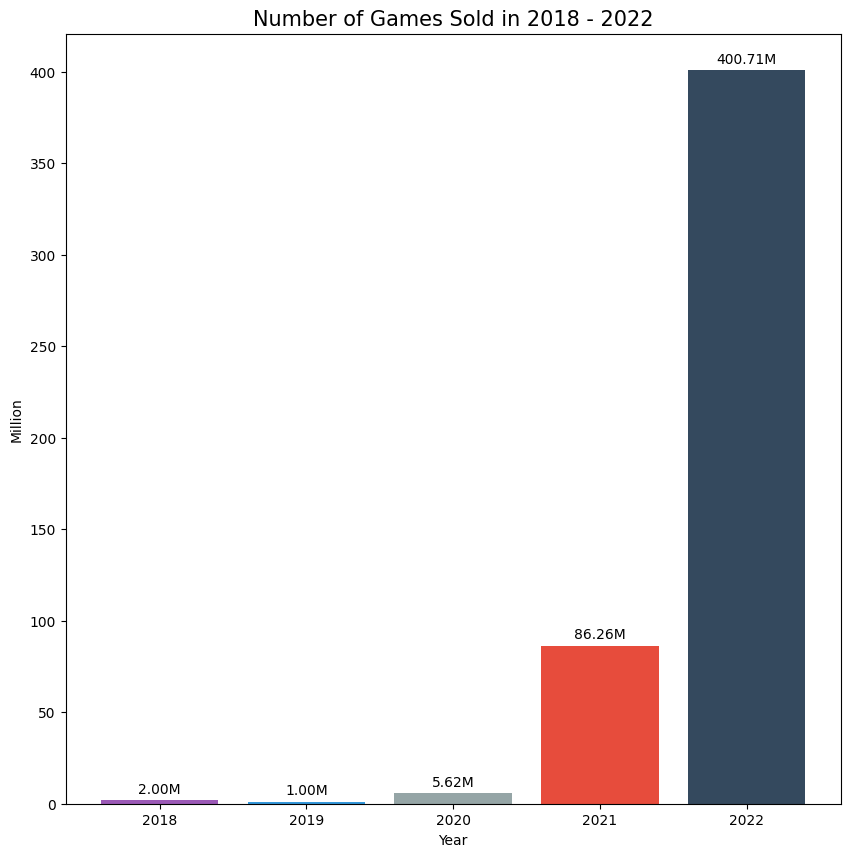

In [28]:
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e"]
color_dict = {'2018':colors[0], '2019':colors[1], '2020':colors[2], '2021':colors[3], '2022':colors[4]}
colors = [color_dict[x] for x in year_df['year']]
plt.figure(figsize=(10,10))
barlist = plt.bar(year_df['year'], year_df['copies_sold']/1000000, color=colors)
for i,bar in enumerate(barlist):
    plt.annotate("{:.2f}M".format(year_df['copies_sold'][i]/1000000),xy=(bar.get_x() + bar.get_width()/2, bar.get_height()), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', rotation = 0)
plt.ylabel('Million')
plt.xlabel('Year')
plt.title('Number of Games Sold in 2018 - 2022',fontsize = 15)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2bb18bf5-22cf-40bf-9281-ae15ebd2ee6c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>